# Whale Optimization Algorithm (WOA)

https://www.sciencedirect.com/science/article/pii/S0965997816300163

"A novel nature-inspired meta-heuristic optimization algorithm, called Whale Optimization Algorithm (WOA), which mimics the social behavior of humpback whales. The algorithm is inspired by the bubble-net hunting strategy. WOA is tested with 29 mathematical optimization problems and 6 structural design problems. Optimization results prove that the WOA algorithm is very competitive compared to the state-of-art meta-heuristic algorithms as well as conventional methods."


In [1]:
# imports
import random
import math
import matplotlib.pyplot as plot
import pandas as pd

# Own module, included in repository
#      Calculates distance between points
import EuclideanDistance as dist

#magic commands
%matplotlib inline


### Classes
The algorithm requieres three diferent type of objects, mainly they could be defined as vectors.

#### Prey Class
<p>The prey class is used to define the objects to be optimized, they have their coordinates in the searchable space and the value that is meant to be optimized</p>
<table>
    <caption>Variables</caption>
    <thead>
        <td>Variable</td>
        <td>Type</td>
        <td>Definition</td>
    </thead>
    <tr>
        <td>x</td>
        <td>float</td>
        <td>the x coordinate of the prey</td>
    </tr>
    <tr>
        <td>y</td>
        <td>float</td>
        <td>the y coordinate of the prey</td>
    </tr>
    <tr>
        <td>value</td>
        <td>float</td>
        <td>Value to optimize</td>
    </tr>
</table>
<table>
    <caption>Methods</caption>
    <thead>
        <td>Method</td>
        <td>Type</td>
        <td>Definition</td>
    </thead>
    <tr>
        <td>toString()</td>
        <td>string</td>
        <td>Returns the object information in a strign with format:<br>
        "[x, y] Value = value"</td>
    </tr>
</table>

#### Whale Class
<p>The whale class is used to define the search agents, they have their coordinates in the searchable space and the prey they are currentrly focusiong at.</p>
<table>
    <caption>Variables</caption>
    <thead>
        <td>Variable</td>
        <td>Type</td>
        <td>Definition</td>
    </thead>
    <tr>
        <td>x</td>
        <td>float</td>
        <td>the x coordinate of the whale</td>
    </tr>
    <tr>
        <td>y</td>
        <td>float</td>
        <td>the y coordinate of the whale</td>
    </tr>
    <tr>
        <td>prey</td>
        <td>Obj. Prey</td>
        <td>Actual focus prey of the whale. <br>Assigned randomly at start,<br>modified during process<br>to reach the one that best<br>accomplishes the<br>optimization criteria.</td>
    </tr>
</table>
<table>
    <caption>Methods</caption>
    <thead>
        <td>Method</td>
        <td>Type</td>
        <td>Definition</td>
    </thead>
    <tr>
        <td>toString()</td>
        <td>string</td>
        <td>Returns the object information in a strign with format:<br>
        "[x, y] Prey = prey.toString()"</td>
    </tr>
</table>

#### Vector Class
<p>The vector class is used to define the variables used to realize the necesy calculations in order for the algorithm to achieve its goal. They have their coordinates in the searchable space and their magnitude.</p>
<table>
    <caption>Variables</caption>
    <thead>
        <td>Variable</td>
        <td>Type</td>
        <td>Definition</td>
    </thead>
    <tr>
        <td>x</td>
        <td>float</td>
        <td>the x magnitude of the vector</td>
    </tr>
    <tr>
        <td>y</td>
        <td>float</td>
        <td>the y magnitude of the vector</td>
    </tr>
    <tr>
        <td>magnitude</td>
        <td>float</td>
        <td>resulting magnitude of the vector</td>
    </tr>
</table>
<table>
    <caption>Methods</caption>
    <thead>
        <td>Method</td>
        <td>Type</td>
        <td>Definition</td>
    </thead>
    <tr>
        <td>calc_x()</td>
        <td>boolean</td>
        <td>Used to calculate x by using magnitude and y
            <br>Is used when y in updated.
            <br>Return a boolean wether the operation was successfull or not,
            <br>so you can know if magnitude is smaller than y or not.
        </td>
    </tr>
    <tr>
        <td>calc_y()</td>
        <td>boolean</td>
        <td>Used to calculate y by using magnitude and x
            <br>Is used when x in updated.
            <br>Return a boolean wether the operation was successfull or not,
            <br>so you can know if magnitude is smaller than x or not.
        </td>
    </tr>
    <tr>
        <td>calc_magnitude()</td>
        <td>void</td>
        <td>Calculates the magnitude of the vector using x and y.</td>
    </tr>
    <tr>
        <td>toString()</td>
        <td>string</td>
        <td>Returns the object information in a strign with format:<br>
        "[x, y] Magnitude = magnitude"</td>
    </tr>
</table>


In [2]:
#Classes
class Prey:
    
    def __init__(self, x, y, value):
        self.x = x
        self.y = y
        self.value = value
        
    def toString(self):
        string = "[" + str(self.x) + ", " + str(self.y) + "] Value = " + str(self.value)
        return string

class Whale:

    def __init__(self, x, y, prey):
        self.x = x
        self.y = y
        self.prey = prey
    
    def toString(self):
        string = "[" + str(self.x) + ", " + str(self.y) + "] Prey = " + str(self.prey.toString())
        return string
        
class Vector:
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.magnitude = math.sqrt((x * x) + (y * y))
    
    def calc_x(self):
        if (self.magnitude * self.magnitude) > (self.y * self.y):
            self.x = math.sqrt((self.magnitude * self.magnitude) - (self.y * self.y))
            return True
        else:
            return False
    
    def calc_y(self):
        if (self.magnitude * self.magnitude) > (self.x * self.x):
            self.y = math.sqrt((self.magnitude * self.magnitude) - (self.x * self.x))
            return True
        else:
            return False
    
    def calc_magnitude(self):
        self.magnitude = sqrt((self.x * self.x) + (self.y * self.y))
        
    def toString(self):
        string = "[" + str(self.x) + ", " + str(self.y) + "] Magnitude = " + str(self.magnitude)
        return string


### Global Variables and Constants

<table>
    <caption>Constants</caption>
    <thead>
        <td>Constant</td>
        <td>Type</td>
        <td>Definition</td>
    </thead>
    <tr>
        <td>mi</td>
        <td>int<td>
        <td>Minimum iterations to complete the algorithm.</td>
    </tr>
    <tr>
        <td>b</td>
        <td>float<td>
        <td>Constant for defining the shape of the logarithmic spiral.</td>
    </tr>
    <tr>
        <td>da</td>
        <td>float<td>
        <td>2/mi. Defines the decrese rate for a.</td>
    </tr>
    <tr>
        <td>r</td>
        <td>Obj. Vector<td>
        <td>Random Vector in [0,1]<br>Defined at the beginning of the algorithm.</td>
    </tr>
</table>

<table>
    <caption>Variables</caption>
    <thead>
        <td>Variable</td>
        <td>type</td>
        <td>Definition</td>
    </thead>
    <tr>
        <td>preys</td>
        <td>list</td>
        <td>list of preys in the searchable space.</td>
    </tr>
    <tr>
        <td>whales</td>
        <td>list</td>
        <td>list of active whales (search agents).</td>
    </tr>
    <tr>
        <td>a</td>
        <td>float</td>
        <td>Control variable for the shrinking encircling mechanism.</td>
    </tr>
</table>

In [3]:
#Global Variables
preys =[]
whales = []

mi = 50
b = 0.618
da = 2/mi

#vector r, it's magnitude is in between [0, 1]
r = Vector(0, 0)
r.magnitude = random.random()
rand = random.random()
while rand > r.magnitude:
    rand = random.random()
r.x = rand
r.calc_y()

#vector a, at the beggining it's magnitude is 2, and is decreased gradually to 0 through the process
a = Vector(0, 0)
a.magnitude = 2
a.x = random.random()*2
a.calc_y()


True

### Beginning of Algorithm
<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0965997816300163-gr6.jpg"></img>

#### Random Data Generation

In [4]:
#prey and whale generation
for i in range(10):
    prey = Prey(random.random()*5, random.random()*5, random.random()*20)
    preys.append(prey)

for i in range(3):
    whale = Whale(random.random()*5, random.random()*5, preys[random.randint(0,10)-1])
    whales.append(whale)

#Printing data by pandas data frame
whalesx = []
whalesy = []
whalesp = []
for whale in whales:
    whalesx.append(whale.x)
    whalesy.append(whale.y)
    whalep = []
    whalep.append(whale.prey.x)
    whalep.append(whale.prey.y)
    whalep.append(whale.prey.value)
    whalesp.append(whalep)

d = {"Whale x": whalesx, "Whale y": whalesy, "Prey value": whalesp[2], "Prey x": whalesp[0], "Prey y": whalesp[1]}
df = pd.DataFrame(data = d)
print("WHALES")
print(df)

preysx = []
preysy = []
preysc = []
preysv = []
for prey in preys:
    preysx.append(prey.x) 
    preysy.append(prey.y)
    preysc.append([prey.x, prey.y])
    preysv.append(prey.value)
    
d = {"Value": preysv, "x": preysx, "y": preysy}
df = pd.DataFrame(data = d)
print("\nPREY")
print(df)
    

WHALES
   Prey value     Prey x    Prey y   Whale x   Whale y
0    1.993971   0.802682  1.829993  2.998868  3.045968
1    2.408490   2.398741  4.215373  2.436363  0.957630
2   17.556166  16.403512  9.894453  4.317699  1.010502

PREY
       Value         x         y
0  16.403512  0.802682  2.398741
1   7.476073  2.669912  2.965674
2  16.292536  1.966911  3.179333
3   0.994908  1.518529  3.579633
4   3.807786  2.144823  1.327920
5  17.556166  1.993971  2.408490
6   9.894453  1.829993  4.215373
7  12.098494  2.515478  0.612838
8  13.631937  0.630402  0.277062
9   8.830238  3.504472  3.438491


In [5]:
#Get the best search agent (initial values)
X = Prey(0, 0, 0)
for whale in whales:
    if whale.prey.value > X.value :
        X = whale.prey
        

### Algorithm Variables 

<table>
    <caption>Variables</caption>
    <thead>
        <td>Variable</td>
        <td>Type</td>
        <td>Definition</td>
    </thead>
    <tr>
        <td>t</td>
        <td>int</td>
        <td>Iteration. Determines the number of the current iteration.</td>
    </tr>
    <tr>
        <td>A</td>
        <td>Obj. Vector</td>
        <td>Coefficient vector, used to calculate new position of whales while the prey encircling mechanism.</td>
    </tr>
    <tr>
        <td>C</td>
        <td>Obj. Vector</td>
        <td>Coefficient vector, used to calculate new position of whales while the prey encircling mechanism.</td>
    </tr>
    <tr>
        <td>D</td>
        <td>Obj. Vector</td>
        <td>Distance between current best answer and whale.</td>
    </tr>
    <tr>
        <td>l</td>
        <td>float</td>
        <td>Random number in range [-1,1].</td>
    </tr>
    <tr>
        <td>p</td>
        <td>float</td>
        <td>Random number between 0 and 1. Used to decide whether to use the<br>shrinking encircling mechanism or the spiral model</td>
    </tr>
    <tr>
        <td>distances</td>
        <td>list</td>
        <td>List of distances between whale and preys</td>
    </tr>
    <tr>
        <td>mindist</td>
        <td>float</td>
        <td>The smallest distance in distances</td>
    </tr>
</table>
    

t = 1


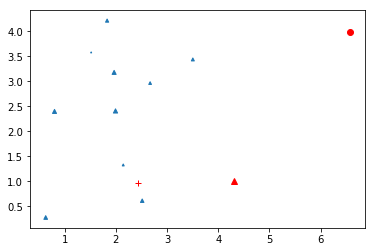

t = 1


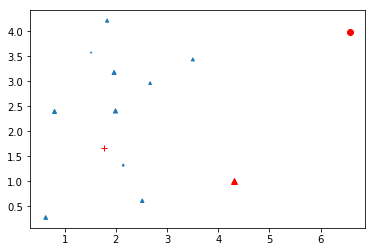

t = 1


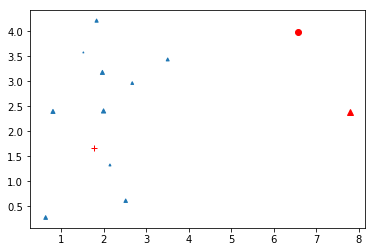

t = 2


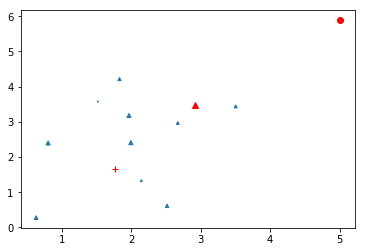

t = 2


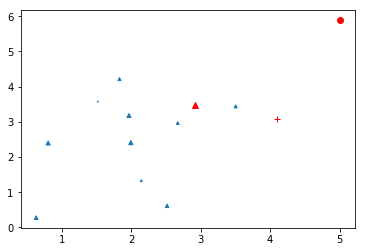

t = 2


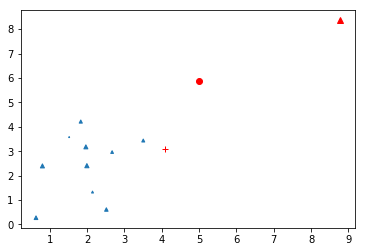

t = 3


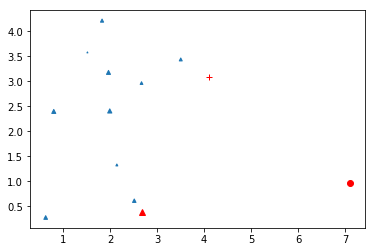

t = 3


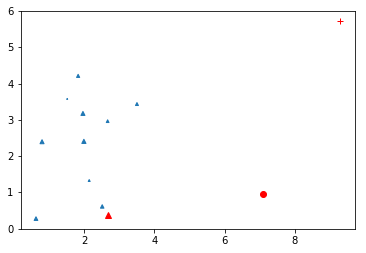

t = 3


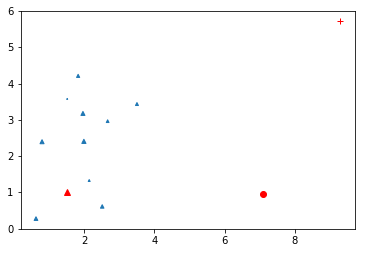

t = 4


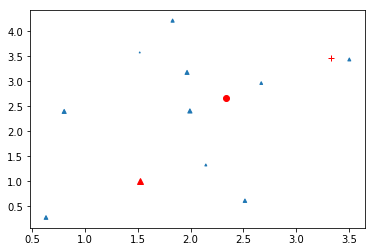

t = 4


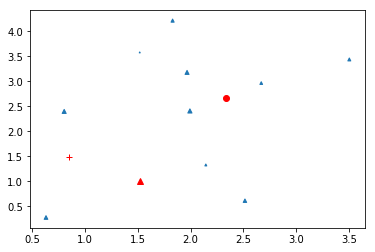

t = 4


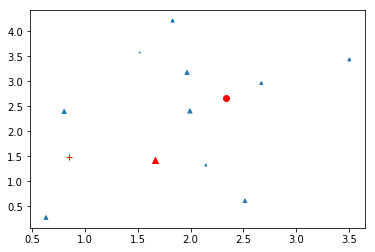

t = 5


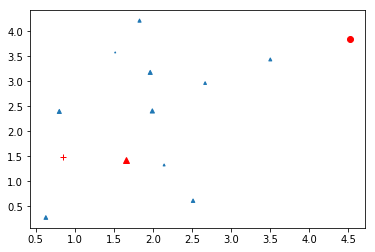

t = 5


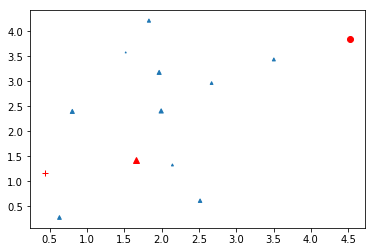

t = 5


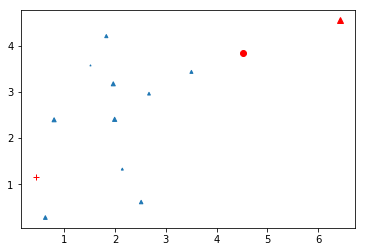

t = 6


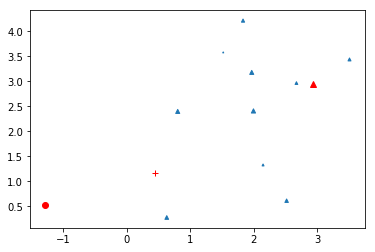

t = 6


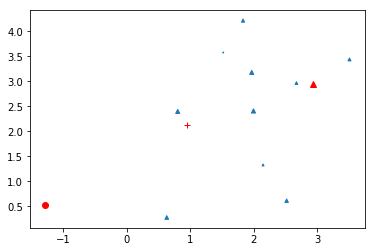

t = 6


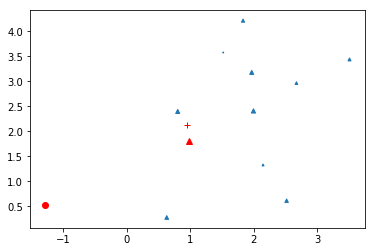

t = 7


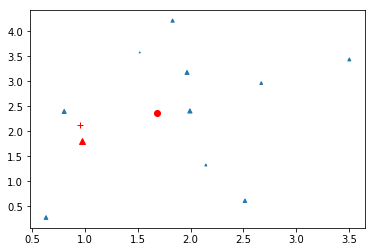

t = 7


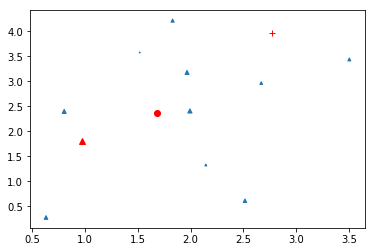

t = 7


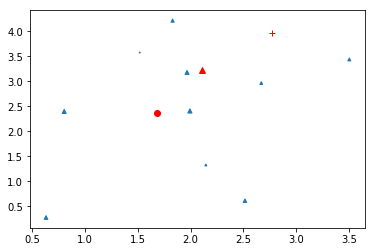

t = 8


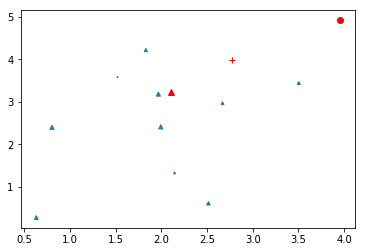

t = 8


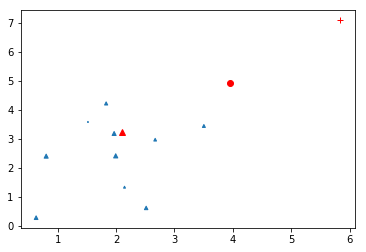

t = 8


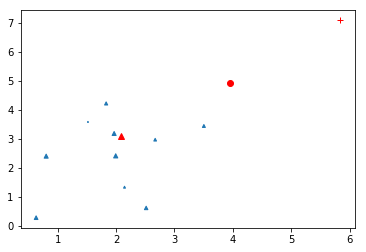

t = 9


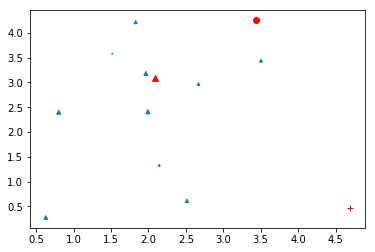

t = 9


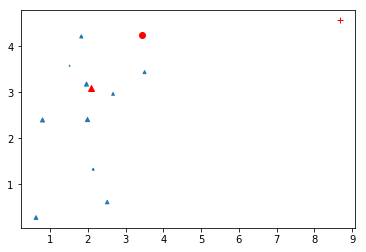

t = 9


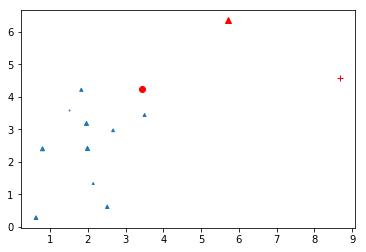

t = 10


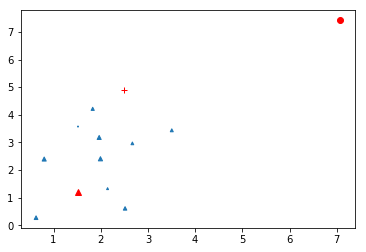

t = 10


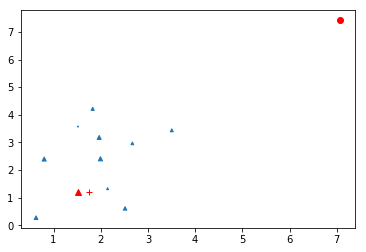

t = 10


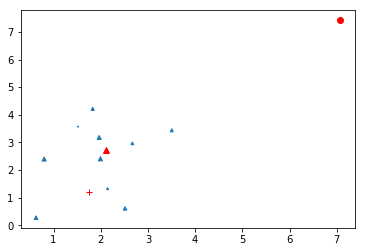

t = 11


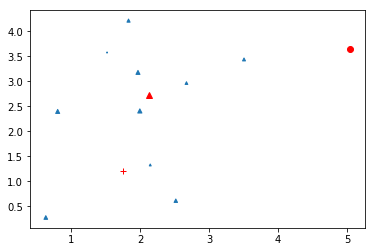

t = 11


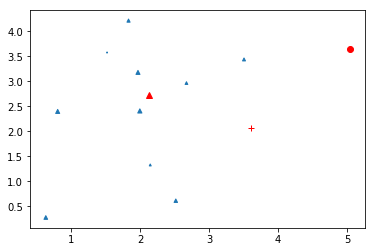

t = 11


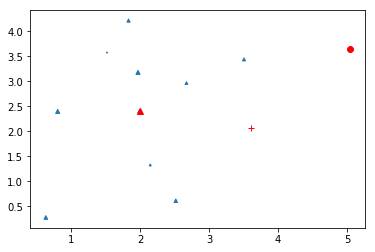

t = 12


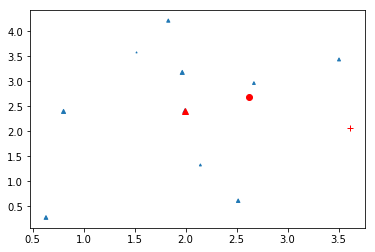

t = 12


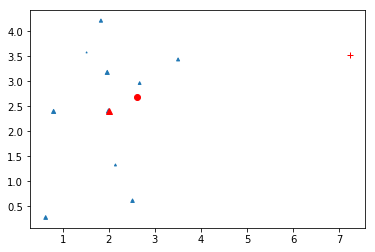

t = 12


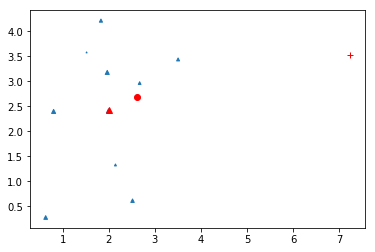

t = 13


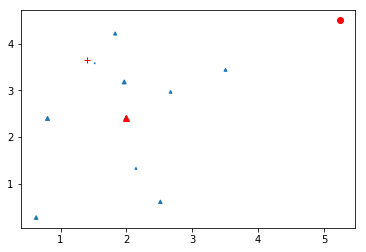

t = 13


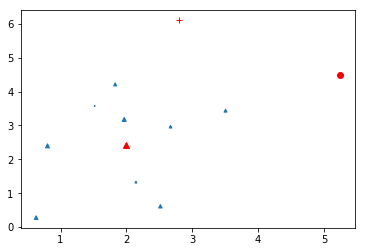

t = 13


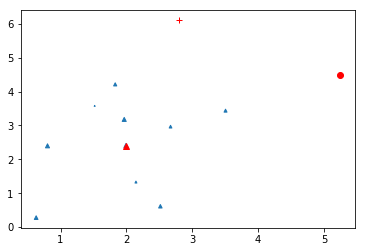

t = 14


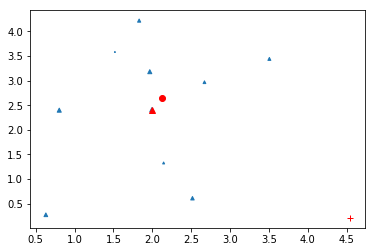

t = 14


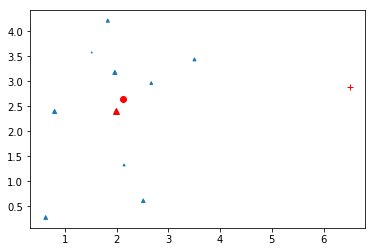

t = 14


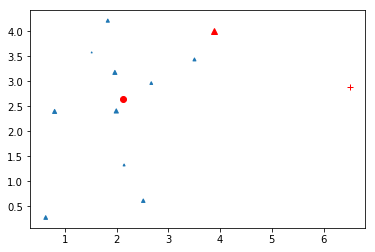

t = 15


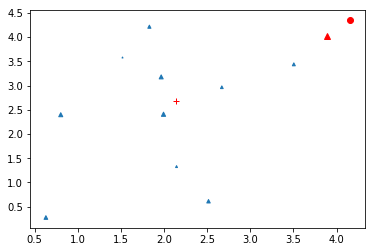

t = 15


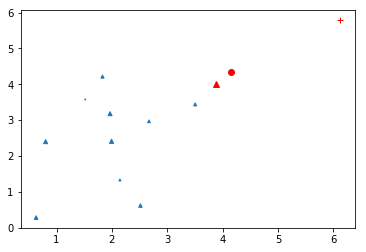

t = 15


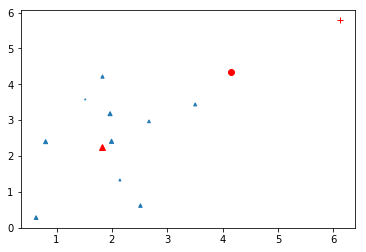

t = 16


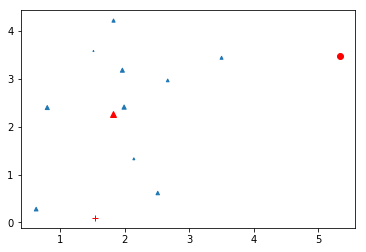

t = 16


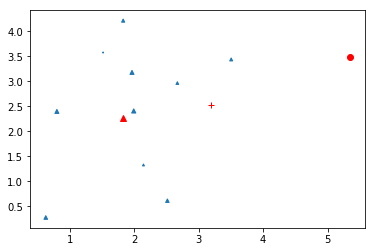

t = 16


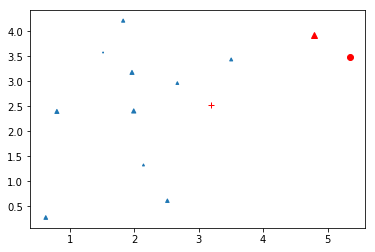

t = 17


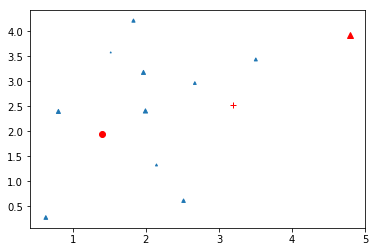

t = 17


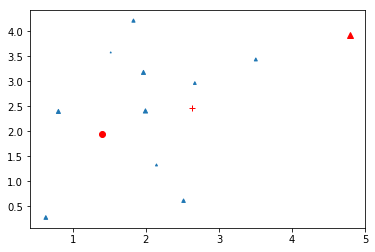

t = 17


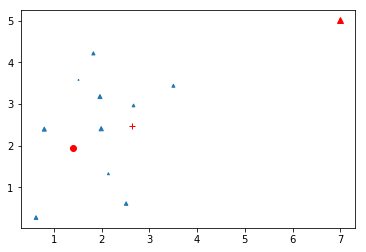

t = 18


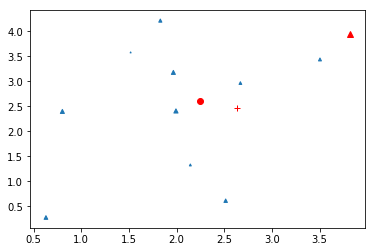

t = 18


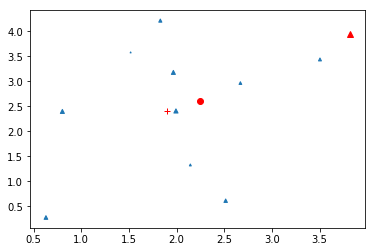

t = 18


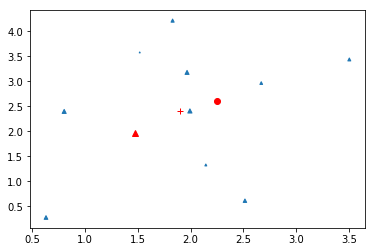

t = 19


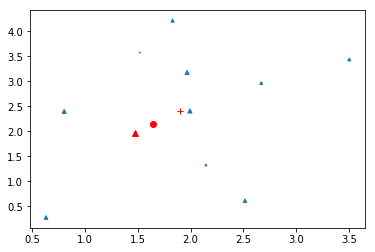

t = 19


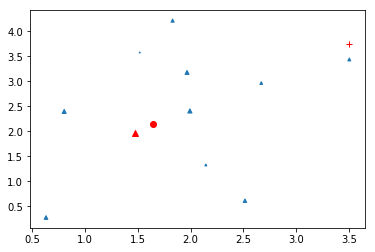

t = 19


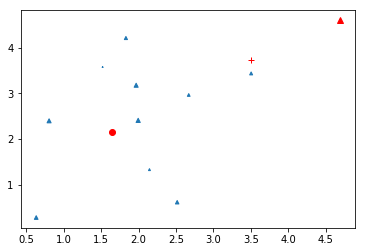

t = 20


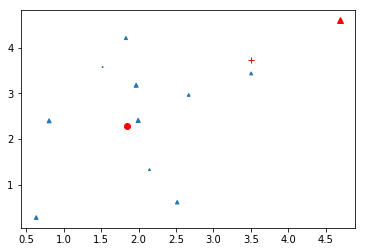

t = 20


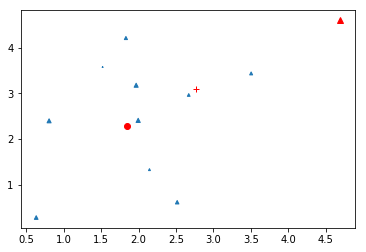

t = 20


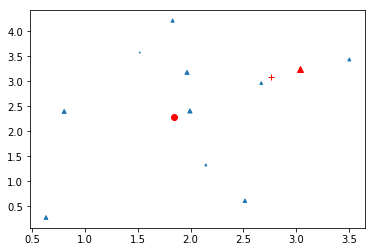

t = 21


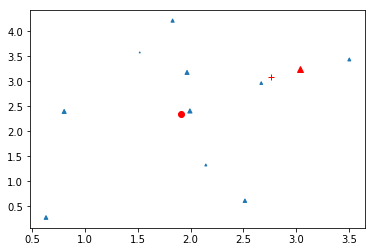

t = 21


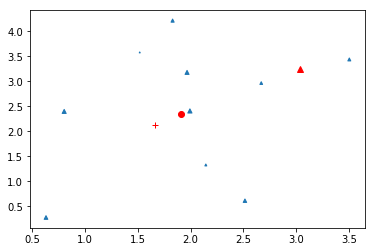

t = 21


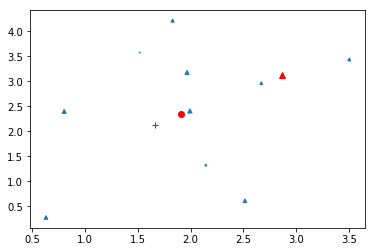

t = 22


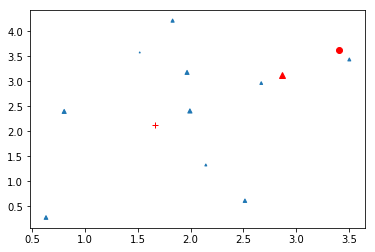

t = 22


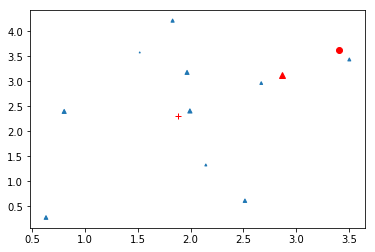

t = 22


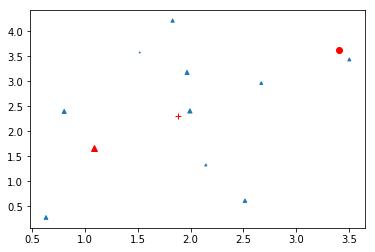

t = 23


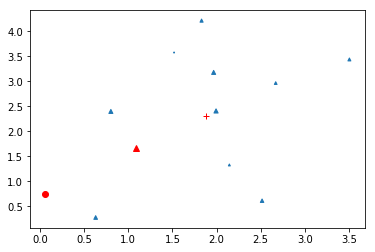

t = 23


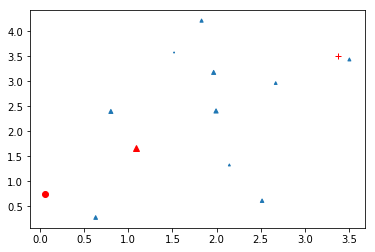

t = 23


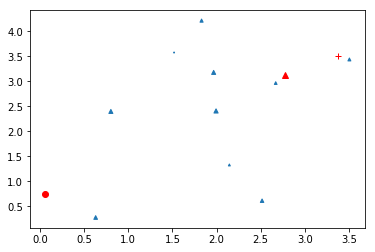

t = 24


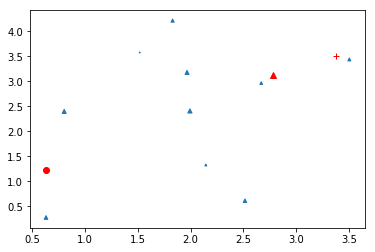

t = 24


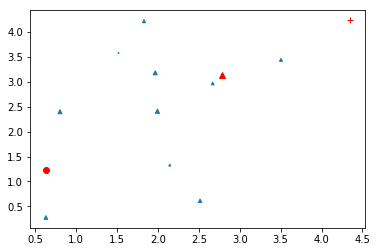

t = 24


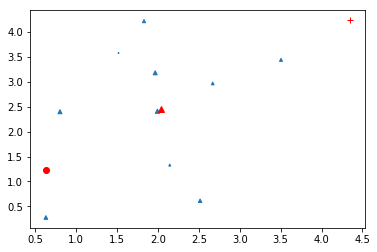

t = 25


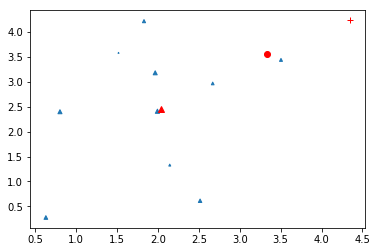

t = 25


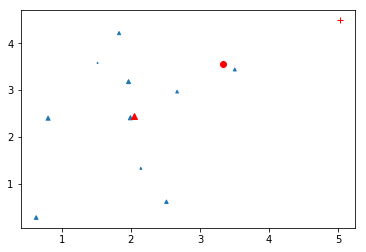

t = 25


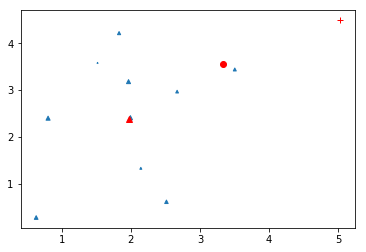

t = 26


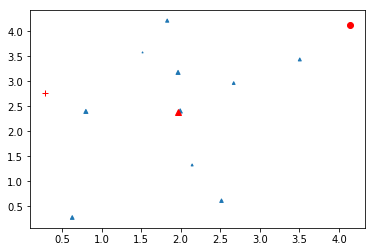

t = 26


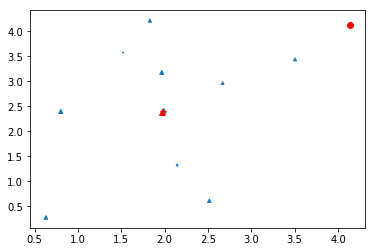

t = 26


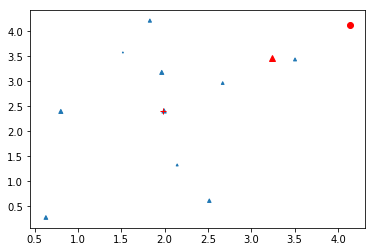

t = 27


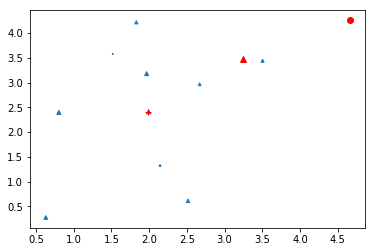

t = 27


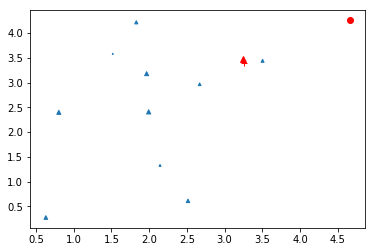

t = 27


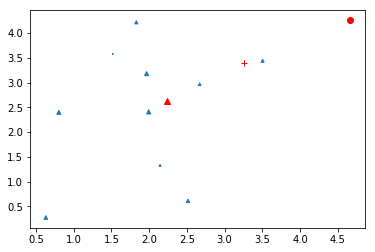

t = 28


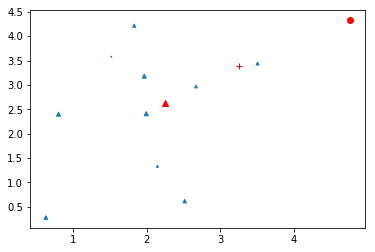

t = 28


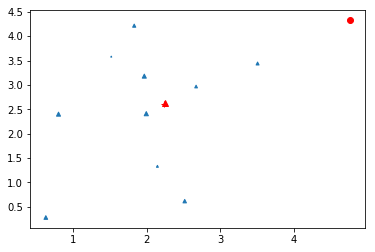

t = 28


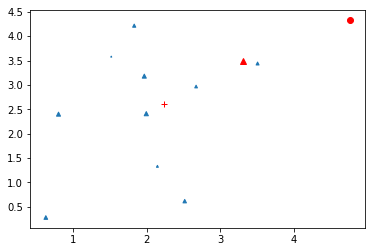

t = 29


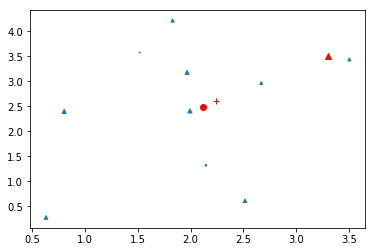

t = 29


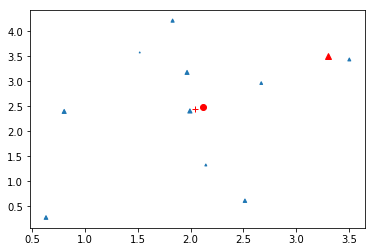

t = 29


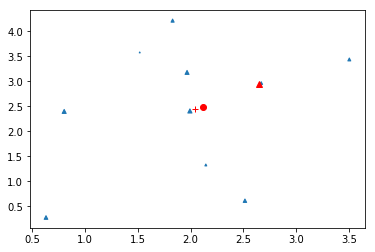

t = 30


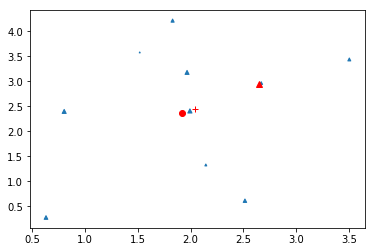

t = 30


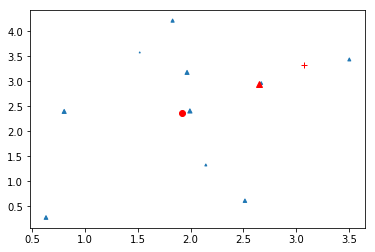

t = 30


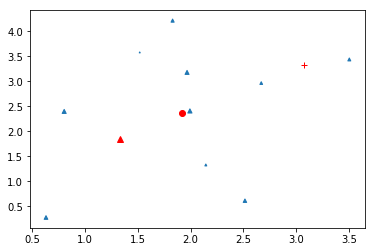

t = 31


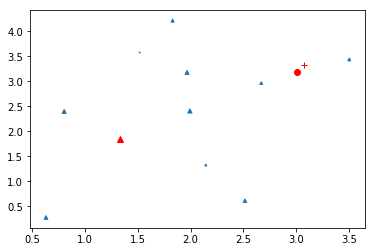

t = 31


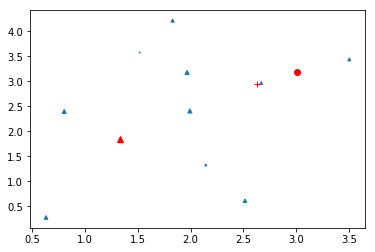

t = 31


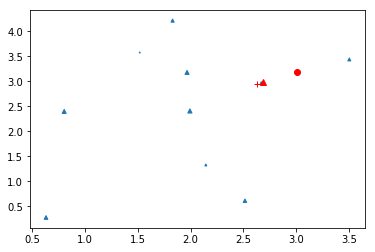

t = 32


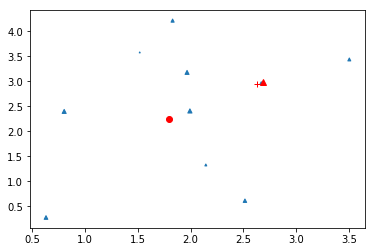

t = 32


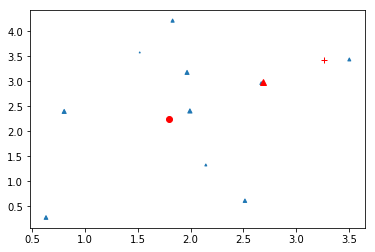

t = 32


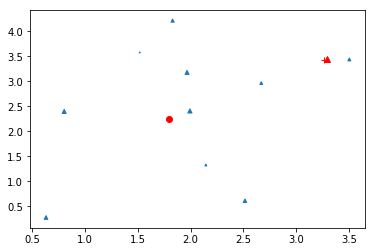

t = 33


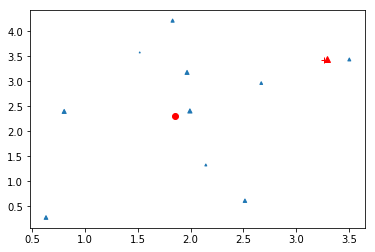

t = 33


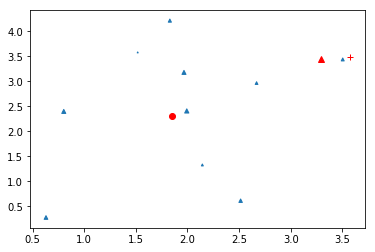

t = 33


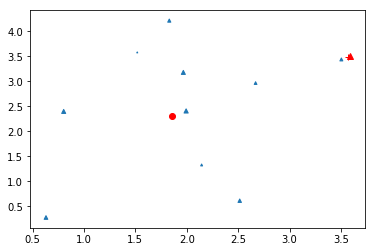

t = 34


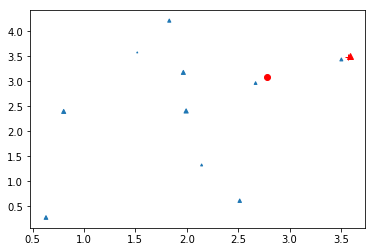

t = 34


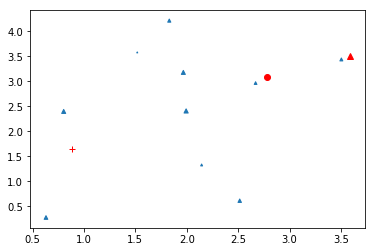

t = 34


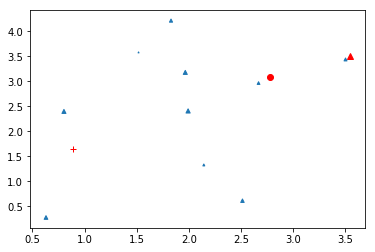

t = 35


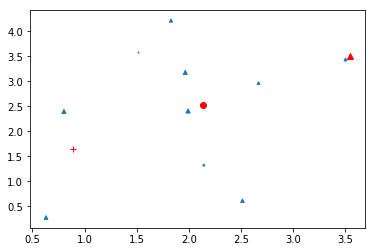

t = 35


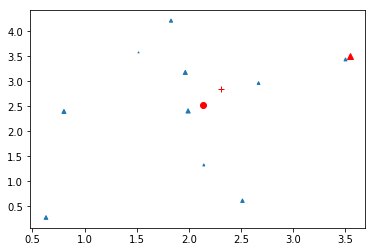

t = 35


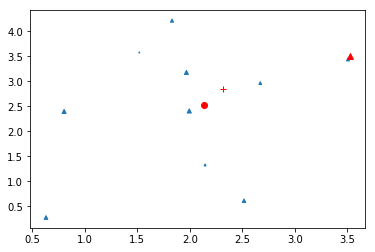

t = 36


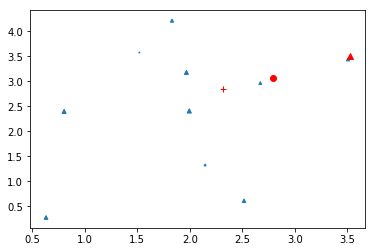

t = 36


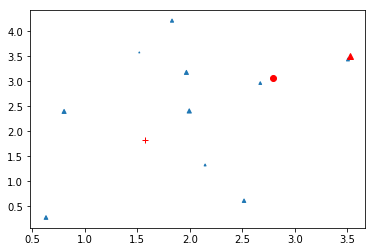

t = 36


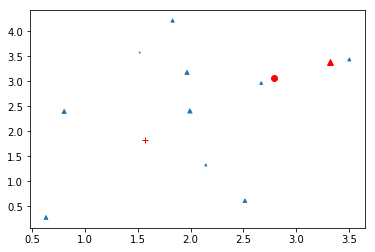

t = 37


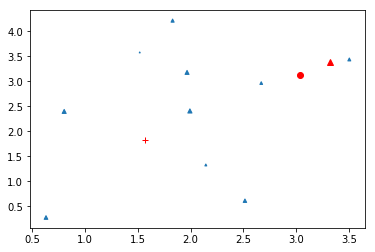

t = 37


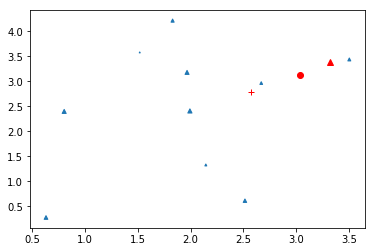

t = 37


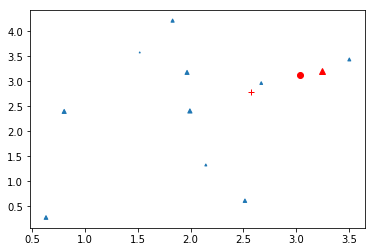

t = 38


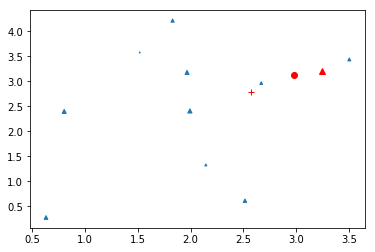

t = 38


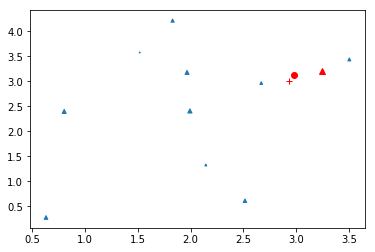

t = 38


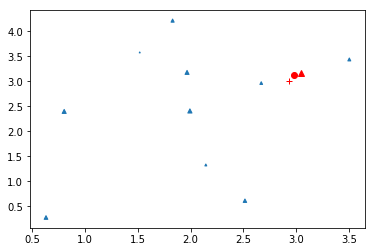

t = 39


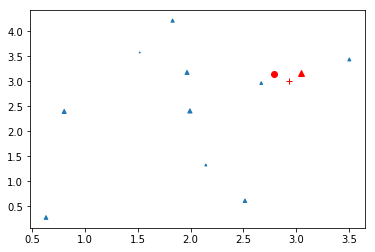

t = 39


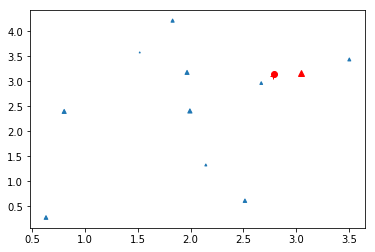

t = 39


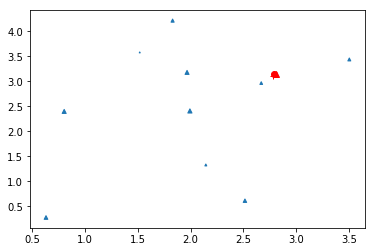

t = 40


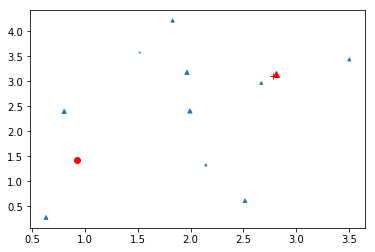

t = 40


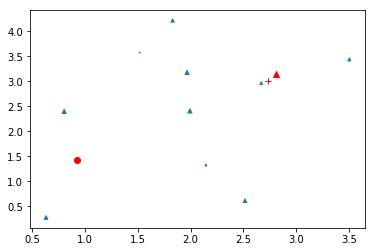

t = 40


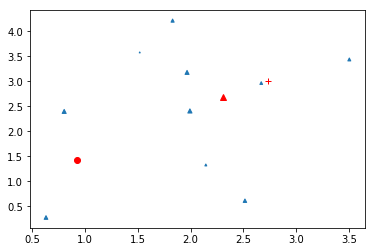

t = 41


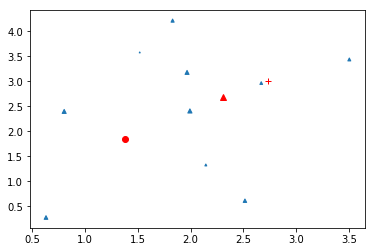

t = 41


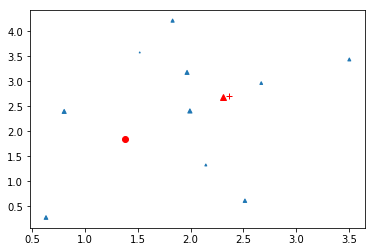

t = 41


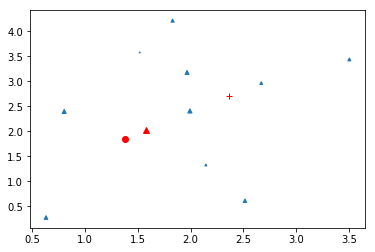

t = 42


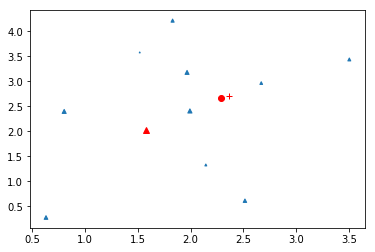

t = 42


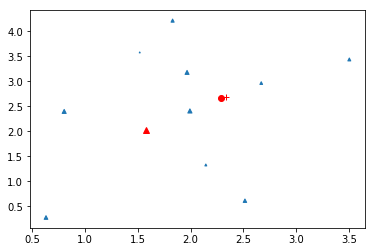

t = 42


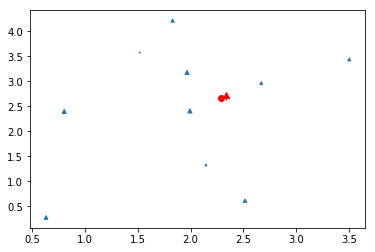

t = 43


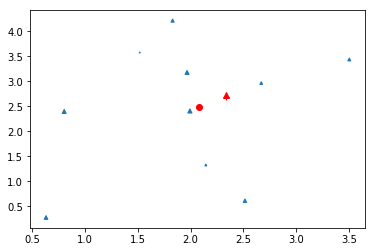

t = 43


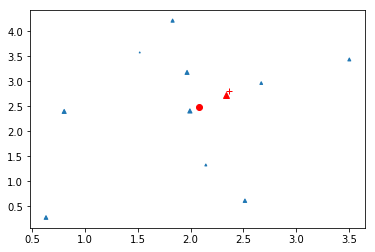

t = 43


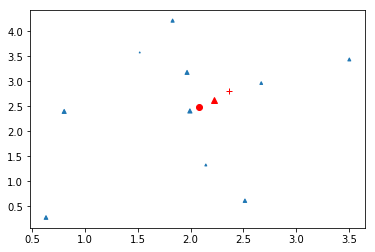

t = 44


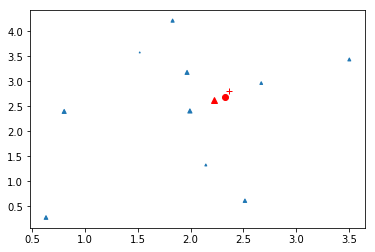

t = 44


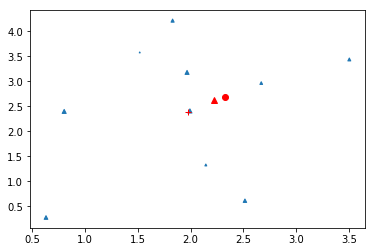

t = 44


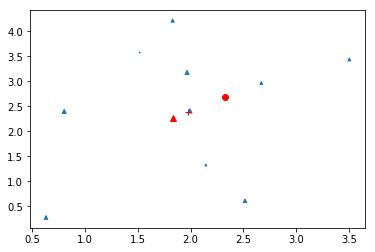

t = 45


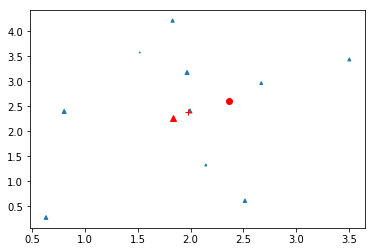

t = 45


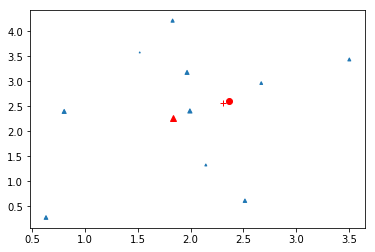

t = 45


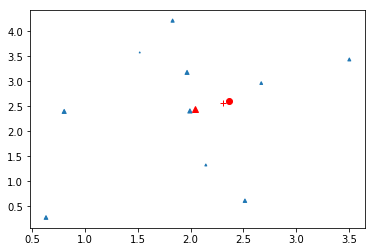

t = 46


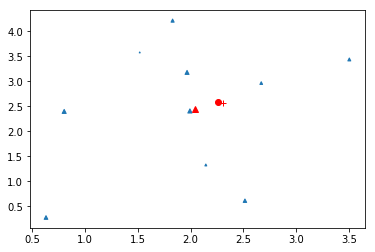

t = 46


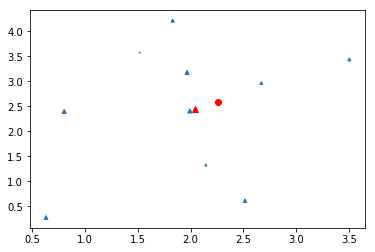

t = 46


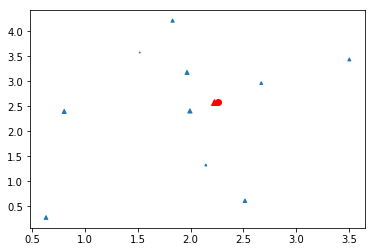

t = 47


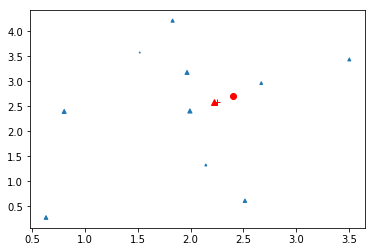

t = 47


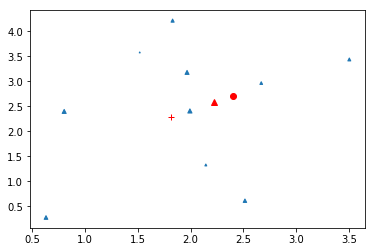

t = 47


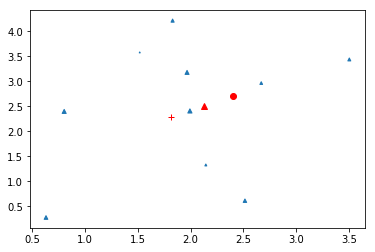

t = 48


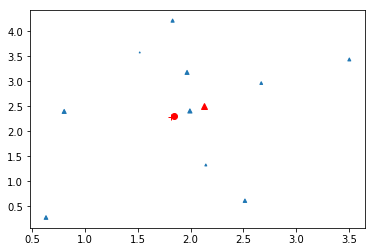

t = 48


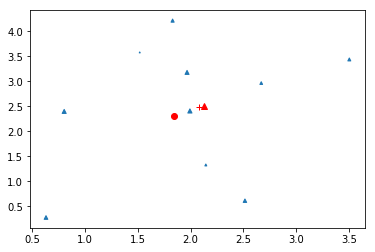

t = 48


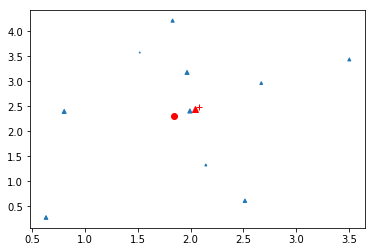

t = 49


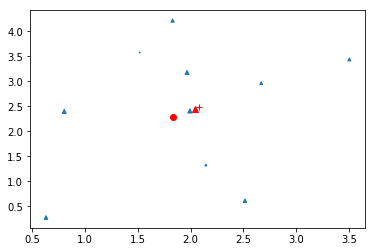

t = 49


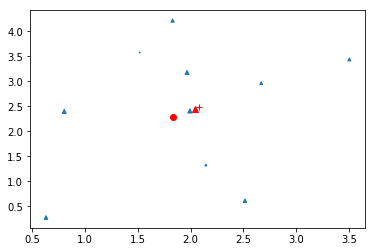

t = 49


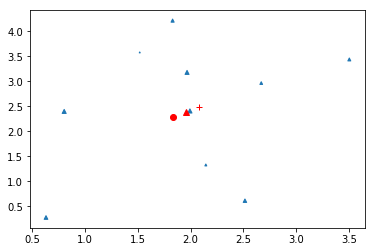

t = 50


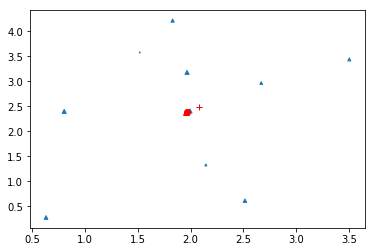

t = 50


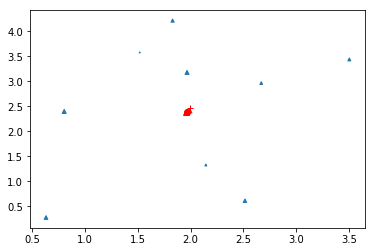

t = 50


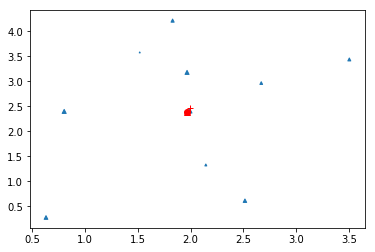

The optimum (maximum in this case) value a pray has is:
[1.993971195034368, 2.408489688939019] Value = 17.55616577837612


In [6]:
#TODO separate whales by theads


#Start the loop
t = 0
while ( t < mi ):
    
    # update a
    a.magnitude -= da
    if a.x > a.y:
        if a.calc_x() == False:
            a.magnitude = 0
            a.x = 0
            a.y = 0
    else:
        if a.calc_y() == False:
            a.magnitude = 0
            a.x = 0
            a.y = 0
            
    # update A & C
    A = Vector(2 * (a.x) * (r.x) - a.x, 2 * (a.y) * (r.y) - a.y)
    C = Vector(2 * r.x, 2 * r.y)
    
    #for each whale
    for whale in whales:
        #initiate D in 0
        D = Vector(0, 0)
        l = random.random()*2 - 1
        p = random.random()
        if (p < 0.5):
            if (abs(A.magnitude) < 1):
                D.x = abs(C.x * X.x - whale.x)
                D.y = abs(C.y * X.y - whale.y)
                whale.x = X.x - A.x * D.x
                whale.y = X.y - A.y * D.y
            elif (abs(A.magnitude) >= 1):
                rand = random.randint(0, len(whales) - 1)
                D.x = abs(C.x * whales[rand].x - whale.x)
                D.y = abs(C.y * whales[rand].y - whale.y)
                whale.x = whales[rand].x - A.x * D.x
                whale.y = whales[rand].y - A.y * D.y
        elif (p >= 0.5):
            D.x = abs(X.x - whale.x)
            D.y = abs(X.y - whale.y)
            whale.x = D.x * math.exp(b * l) * math.cos(2 * math.pi * l) + X.x
            whale.y = D.y * math.exp(b * l) * math.cos(2 * math.pi * l) + X.y
        whalesx = []
        whalesy = []
        for whale in whales:
            whalesx.append(whale.x)
            whalesy.append(whale.y)
        plot.scatter(preysx, preysy, s = preysv, marker = '^')
        # plot.scatter(whalesx, whalesy)

        # plot.plot(preysx, preysy, 'bo')
        plot.plot(whalesx[0], whalesy[0],'ro')
        plot.plot(whalesx[1], whalesy[1],'r+')
        plot.plot(whalesx[2], whalesy[2],'r^')

        print("t = " + str(t + 1))
        plot.show()

        
    
    for whale in whales:
        if (whale.x > 5 or whale.x < 0) or (whale.y > 5 or whale.y < 0):
            whale.x = random.random()*5
            whale.y = random.random()*5
    
    for whale in whales:
        preysc = []
        for prey in preys:
            if prey != whale.prey:
                preysc.append([prey.x, prey.y])
        distances = dist.EuclideanDistance([whale.x, whale.y], preysc)
        mindist = min(distances)
        for i in range(len(distances)):
            if distances[i] == mindist:
                if preys[i].value > whale.prey.value:
                    whale.prey = preys[i]
                
        if whale.prey.value > X.value :
            X = whale.prey

    t += 1
    
#     print(" - ITERATION " + str(t) + " - ")
#     print("X       " + X.toString())
#     print("Whale 0 " + whales[0].toString())
#     print("Whale 1 " + whales[1].toString())
#     print("Whale 2 " + whales[2].toString() + "\n")

print("The optimum (maximum in this case) value a pray has is:\n" + X.toString())

    

